In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

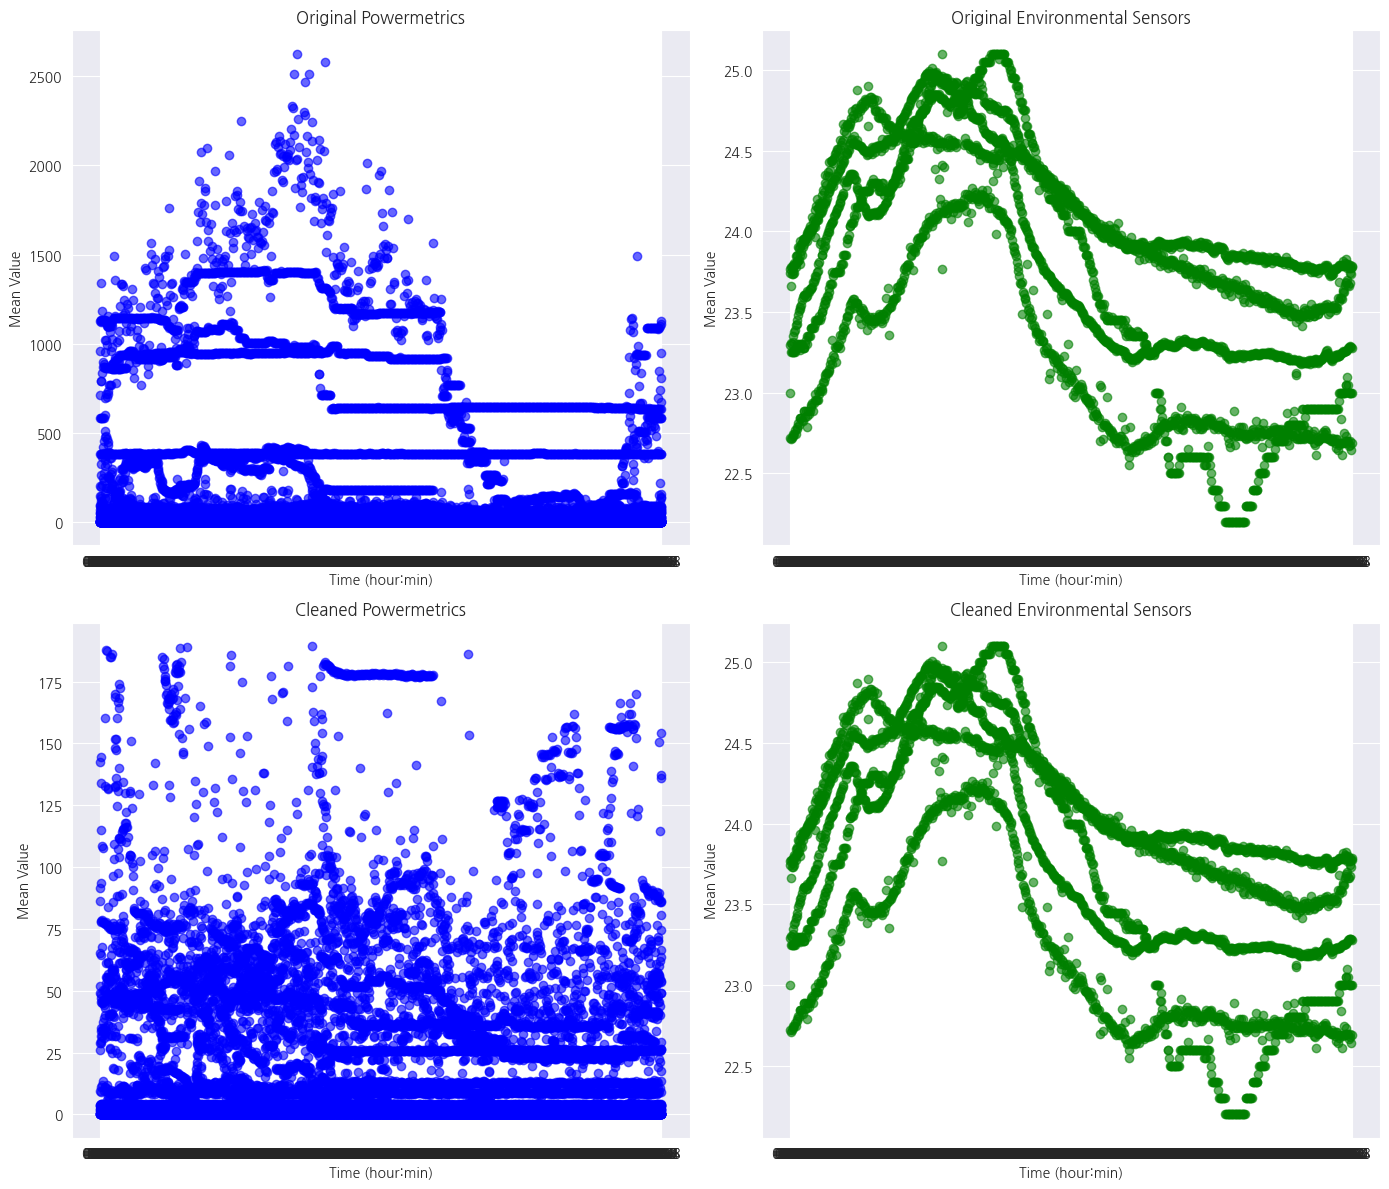

In [9]:
# 데이터 로드
powermetrics_data = pd.read_csv('powermetrics_stats.csv')
environmentalsensors_data = pd.read_csv('environmentalsensors_stats.csv')

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

# 이상치 제거
cleaned_powermetrics_data = remove_outliers(powermetrics_data, 'mean_value')
cleaned_environmentalsensors_data = remove_outliers(environmentalsensors_data, 'mean_value')

# 산점도 그리기
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# 원본 데이터 산점도
ax[0, 0].scatter(powermetrics_data['time_hour_min'], powermetrics_data['mean_value'], alpha=0.6, color='blue')
ax[0, 0].set_title('Original Powermetrics')
ax[0, 1].scatter(environmentalsensors_data['time_hour_min'], environmentalsensors_data['mean_value'], alpha=0.6, color='green')
ax[0, 1].set_title('Original Environmental Sensors')

# 이상치 제거 후 산점도
ax[1, 0].scatter(cleaned_powermetrics_data['time_hour_min'], cleaned_powermetrics_data['mean_value'], alpha=0.6, color='blue')
ax[1, 0].set_title('Cleaned Powermetrics')
ax[1, 1].scatter(cleaned_environmentalsensors_data['time_hour_min'], cleaned_environmentalsensors_data['mean_value'], alpha=0.6, color='green')
ax[1, 1].set_title('Cleaned Environmental Sensors')

for a in ax.flat:
    a.set(xlabel='Time (hour:min)', ylabel='Mean Value')
    a.grid(True)

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 데이터 로드
powermetrics_data = pd.read_csv('powermetrics_stats.csv')
environmentalsensors_data = pd.read_csv('environmentalsensors_stats.csv')

# 시간 데이터 처리 ('HH:MM' 형식을 'HH.MM' 형식으로 변환하여 숫자형으로 취급)
powermetrics_data['time_hour_min'] = powermetrics_data['time_hour_min'].str.replace(':', '.').astype(float)
environmentalsensors_data['time_hour_min'] = environmentalsensors_data['time_hour_min'].str.replace(':', '.').astype(float)

# 'time_hour_min'과 'mean_value'에 대해 DBSCAN 적용 (Powermetrics 데이터)
data_to_cluster = powermetrics_data[['time_hour_min', 'mean_value']]
data_to_cluster_scaled = StandardScaler().fit_transform(data_to_cluster)
db = DBSCAN(eps=0.3, min_samples=10).fit(data_to_cluster_scaled)
labels = db.labels_
cleaned_data = powermetrics_data[labels != -1]

# 'time_hour_min'과 'mean_value'에 대해 DBSCAN 적용 (Environmental Sensors 데이터)
data_to_cluster2 = environmentalsensors_data[['time_hour_min', 'mean_value']]
data_to_cluster2_scaled = StandardScaler().fit_transform(data_to_cluster2)
db2 = DBSCAN(eps=0.3, min_samples=10).fit(data_to_cluster2_scaled)
labels2 = db2.labels_
cleaned_data2 = environmentalsensors_data[labels2 != -1]

# 결과 확인
original_count = powermetrics_data.shape[0]
cleaned_count = cleaned_data.shape[0]
original_count2 = environmentalsensors_data.shape[0]
cleaned_count2 = cleaned_data2.shape[0]

print('Powermetrics - Original data count:', original_count)
print('Powermetrics - Cleaned data count:', cleaned_count)
print('Environmental Sensors - Original data count:', original_count2)
print('Environmental Sensors - Cleaned data count:', cleaned_count2)

Powermetrics - Original data count: 19440
Powermetrics - Cleaned data count: 19424
Environmental Sensors - Original data count: 3600
Environmental Sensors - Cleaned data count: 3600


In [17]:
# 두 데이터프레임 병합 (공통 시간 열을 기준으로)
merged_data = pd.merge(cleaned_data, cleaned_data2, on='time_hour_min', suffixes=('_power', '_env'))

# 상관계수 계산 (Pearson)
correlation_matrix = merged_data.corr()

# 관심 있는 열만 출력 (예: 'mean_value_power'와 'mean_value_env'의 상관계수)
print("상관계수 (mean_value_power vs mean_value_env):", correlation_matrix.loc['mean_value_power', 'mean_value_env'])

상관계수 (mean_value_power vs mean_value_env): 0.14808103440313863
